In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ahorro_anual = 20000
años = 17
tasa_promedio = 0.04
desviacion_estandar = 0.10
num_simulaciones = 1000

In [3]:
def simulacion_montecarlo(ahorro_anual, años, tasa_promedio, desviacion_estandar, num_simulaciones):
    resultados = []
    for _ in range(num_simulaciones):
        ahorros = 0
        rendimiento_anual = np.random.normal(tasa_promedio, desviacion_estandar, años)
        monto_acumulado = []
        for rendimiento in rendimiento_anual:
            ahorros = (ahorros + ahorro_anual) * (1 + rendimiento)
            monto_acumulado.append(ahorros)
        resultados.append(monto_acumulado)
    return np.array(resultados)

resultados = simulacion_montecarlo(ahorro_anual, años, tasa_promedio, desviacion_estandar, num_simulaciones)

In [4]:
monto_promedio_acumulado = np.mean(resultados[:,-1])

escenario_pesimista = np.min(resultados[:,-1])
escenario_optimista = np.max(resultados[:,-1])

print(f"Monto promedio acumulado: {monto_promedio_acumulado:.2f}")
print(f"Escenario pesimista: {escenario_pesimista:.2f}")
print(f"Escenario optimista: {escenario_optimista:.2f}")

Monto promedio acumulado: 490848.73
Escenario pesimista: 203189.34
Escenario optimista: 1065799.90


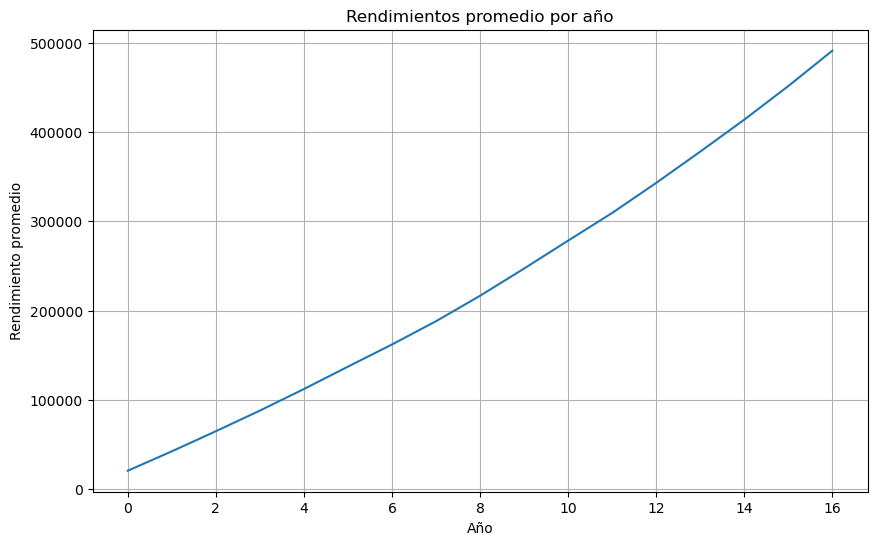

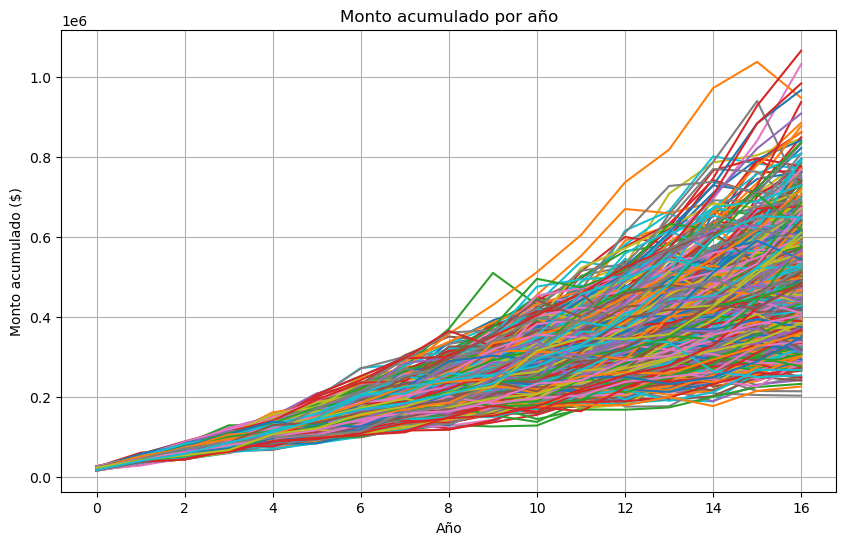

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(resultados.mean(axis=0))
plt.title("Rendimientos promedio por año")
plt.xlabel("Año")
plt.ylabel("Rendimiento promedio")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(resultados.T)
plt.title("Monto acumulado por año")
plt.xlabel("Año")
plt.ylabel("Monto acumulado ($)")
plt.grid(True)
plt.show()